In [21]:
# Paul Barrett
# Tiny Image Classification problem

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

## Load the data

In [25]:
base_dir = 'C:\\Users\\Paul\\Google Drive\\2018 Fall\\CS460G\\Notebooks\\assignment5data\\';

# load features, ignore header, ignore IDs
X_train = np.loadtxt(base_dir + 'train_features.csv', delimiter=',')[:,1:];
X_test = np.loadtxt(base_dir + 'test_features.csv', delimiter=',')[:,1:];
y_train = np.loadtxt(base_dir + 'train_labels.csv', dtype=np.uint8, delimiter=',', skiprows=1)[:,-1];

## Visualize the Images

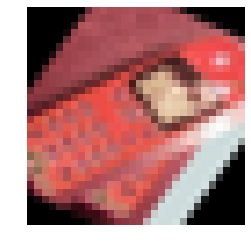

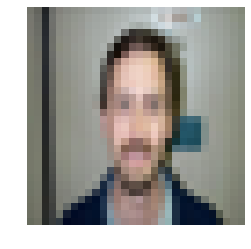

In [3]:
im_train = X_train[0,:].reshape((30,30,3), order='F')
im_test = X_test[0,:].reshape((30,30,3), order='F')

plt.figure(1)
plt.imshow(im_train/255)
plt.axis('off')

plt.figure(2)
plt.imshow(im_test/255)
plt.axis('off');

## Split Data for Parameter Search

In [26]:
# scale data
X = preprocessing.scale(X_train)
y = preprocessing.scale(y_train)

#split data in half, random state off
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train,
                                                                            test_size=0.5, random_state=0)

## Find best KNN Parameters

Best params:  {'n_neighbors': 3}

Classification report: 

              precision    recall  f1-score   support

           1       0.83      0.70      0.76        43
           2       0.25      0.92      0.39        36
           3       0.55      0.84      0.67        38
           4       0.53      0.30      0.38        30
           5       0.39      0.73      0.51        44
           6       0.29      0.22      0.25        18
           7       0.14      0.12      0.13        26
           8       0.03      0.04      0.03        27
           9       0.11      0.14      0.12        29
          10       0.09      0.15      0.11        20
          11       0.67      0.22      0.33        18
          12       0.21      0.47      0.29        40
          13       0.47      0.50      0.48        56
          14       0.13      0.10      0.11        20
          15       0.21      0.13      0.16        31
          16       0.22      0.11      0.14        38
          17       0.8

Text(0.5, 53.5, 'Predicted Class')

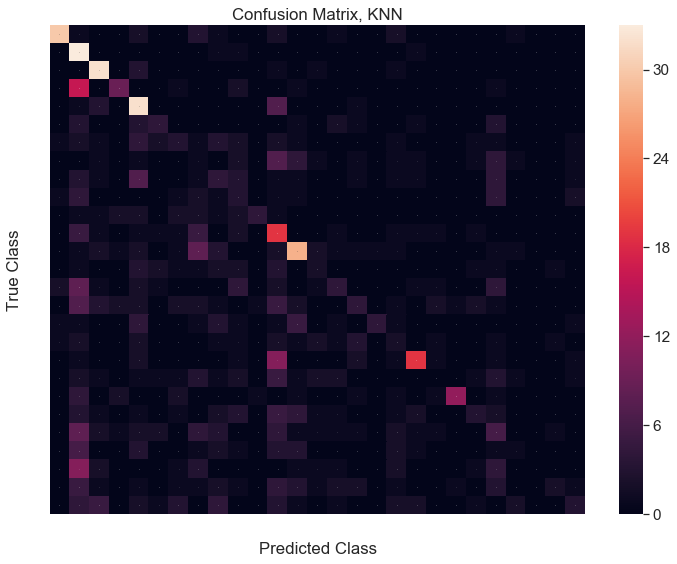

In [27]:
#build a classifier
clf = KNeighborsClassifier(n_jobs=-1)

#create parameter distribution
param_dist = {"n_neighbors": sp_randint(3, 4)}

#number of parameter settings that are sampled
n_iter_search = 20
#run randomized search
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

#fit and find best params
random_search.fit(X_train_split, y_train_split)
print("Best params: ", random_search.best_params_); print()

#predict and show classification report
y_true, y_pred = y_test_split, random_search.predict(X_test_split)

print("Classification report: "); print()
print(classification_report(y_true, y_pred))

#create and show confusion matrix
cnf_matrix = confusion_matrix(y_test_split, y_pred)
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in "                           "],
                  columns = [i for i in "                           "])
sn.set(font_scale=1.4)#for label size
plt.figure(figsize = (12,9))
sn.heatmap(df_cm, annot=True,annot_kws={"size": 0})
plt.title('Confusion Matrix, KNN')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')

# Make KNN Submission Using Best Parameters

In [6]:
KNNclf = KNeighborsClassifier(n_jobs=-1, n_neighbors = 3)

KNNclf.fit(X_train, y_train)
df = pd.DataFrame(KNNclf.predict(X_test), columns=['Label'])
df.index += 1 # upgrade to one-based indexing
df.to_csv('PaulBarrett_KNN_submission.csv',index_label='ID',columns=['Label'])

## Find best Random Forest Parameters


Best params:  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 9, 'min_samples_split': 6, 'n_estimators': 179, 'random_state': False}
Classification report: 

              precision    recall  f1-score   support

           1       0.67      0.79      0.72        43
           2       0.67      0.97      0.80        36
           3       0.62      0.87      0.73        38
           4       0.76      0.97      0.85        30
           5       0.63      0.75      0.69        44
           6       0.80      0.22      0.35        18
           7       0.00      0.00      0.00        26
           8       1.00      0.04      0.07        27
           9       0.00      0.00      0.00        29
          10       0.40      0.20      0.27        20
          11       0.71      0.28      0.40        18
          12       0.36      0.42      0.39        40
          13       0.62      0.50      0.55        56
          14       0.15      0.15      0.15        2

Text(0.5, 53.5, 'Predicted Class')

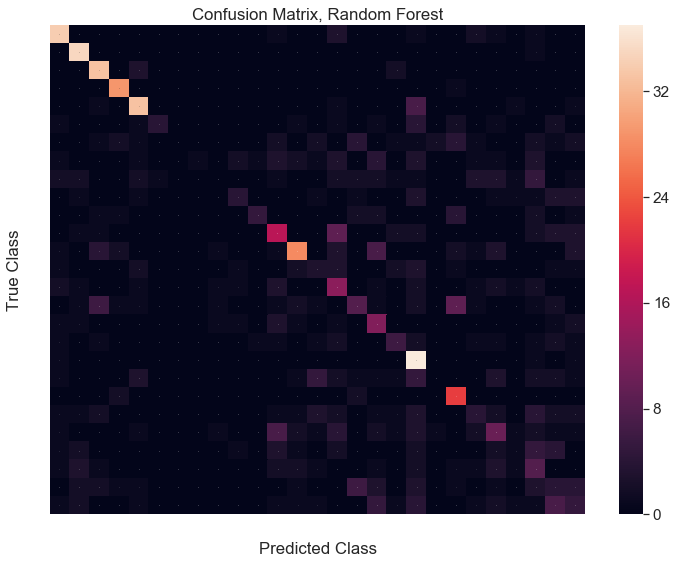

In [28]:
## Find Best Random Forest Parameters

#build a classifier
clf = RandomForestClassifier()

#create parameter distribution
param_dist = {"n_estimators": sp_randint(150, 200),
              "max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "random_state": [True, False],
              "criterion": ["gini", "entropy"]}

#number of parameter settings that are sampled
n_iter_search = 20
#run randomized search
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

#fit and find best params
random_search.fit(X_train_split, y_train_split)
print()
print("Best params: ", random_search.best_params_)

#predict and show classification report
y_true, y_pred = y_test_split, random_search.predict(X_test_split)

print("Classification report: "); print()
print(classification_report(y_true, y_pred))

#create and show confusion matrix
cnf_matrix = confusion_matrix(y_test_split, y_pred)
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in "                           "],
                  columns = [i for i in "                           "])
sn.set(font_scale=1.4)#for label size
plt.figure(figsize = (12,9))
sn.heatmap(df_cm, annot=True,annot_kws={"size": 0})
plt.title('Confusion Matrix, Random Forest')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')

# Make Random Forest Submission Using Best Parameters

In [20]:
RandForestclf = RandomForestClassifier(n_estimators = 183,
                                       random_state = True,
                                       max_depth = None,
                                       bootstrap = False,
                                       criterion = "entropy",
                                       min_samples_split = 4,
                                       max_features = 7)
RandForestclf.fit(X_train, y_train)
df = pd.DataFrame(RandForestclf.predict(X_test), columns=['Label'])
df.index += 1 # upgrade to one-based indexing
df.to_csv('PaulBarrett_RandForest_submission.csv',index_label='ID',columns=['Label'])

## Find Best Decision Tree Parameters

Best params:  {'criterion': 'gini', 'max_depth': None, 'max_features': 8, 'min_samples_split': 8, 'random_state': True}

Classification report: 

              precision    recall  f1-score   support

           1       0.44      0.26      0.32        43
           2       0.32      0.56      0.40        36
           3       0.50      0.82      0.62        38
           4       0.46      0.43      0.45        30
           5       0.56      0.50      0.53        44
           6       0.00      0.00      0.00        18
           7       0.05      0.08      0.06        26
           8       0.00      0.00      0.00        27
           9       0.05      0.03      0.04        29
          10       0.00      0.00      0.00        20
          11       0.00      0.00      0.00        18
          12       0.18      0.17      0.18        40
          13       0.42      0.14      0.21        56
          14       0.10      0.10      0.10        20
          15       0.11      0.13      0.12

Text(0.5, 53.5, 'Predicted Class')

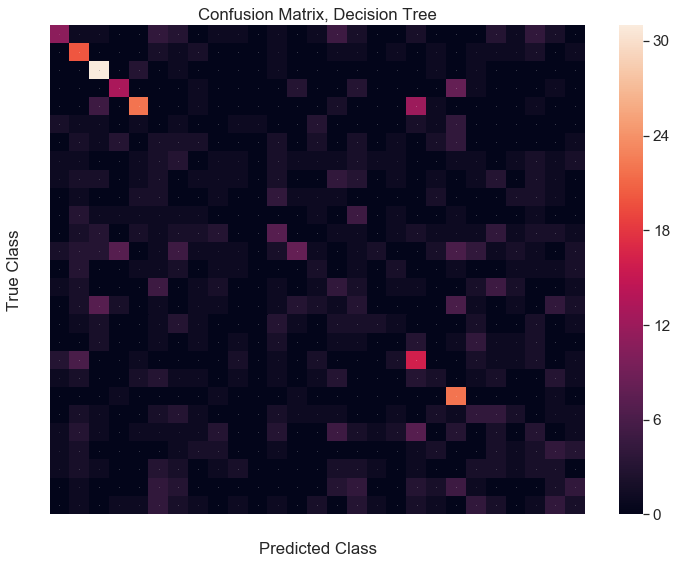

In [29]:
#build a classifier
clf = tree.DecisionTreeClassifier()

param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "random_state": [True, False],
              "criterion": ["gini", "entropy"]}

n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

random_search.fit(X_train_split, y_train_split)
print("Best params: ", random_search.best_params_); print()

y_true, y_pred = y_test_split, random_search.predict(X_test_split)

print("Classification report: "); print()
print(classification_report(y_true, y_pred))

#create and show confusion matrix
cnf_matrix = confusion_matrix(y_test_split, y_pred)
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in "                           "],
                  columns = [i for i in "                           "])
sn.set(font_scale=1.4)#for label size
plt.figure(figsize = (12,9))
sn.heatmap(df_cm, annot=True,annot_kws={"size": 0})
plt.title('Confusion Matrix, Decision Tree')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')

# Make Decision Tree Submission using Best Parameters

In [10]:
Treeclf = tree.DecisionTreeClassifier(criterion = "gini",
                                    max_depth = None,
                                    max_features = 8,
                                    min_samples_split = 3,
                                    random_state = True)
Treeclf.fit(X_train, y_train)
df = pd.DataFrame(Treeclf.predict(X_test), columns=['Label'])
df.index += 1 # upgrade to one-based indexing
df.to_csv('PaulBarrett_DecisionTree_submission.csv',index_label='ID',columns=['Label'])

## Find Best SVM Parameters

Best params:  {'shrinking': False, 'random_state': False, 'probability': True, 'kernel': 'linear'}

Classification report: 

              precision    recall  f1-score   support

           1       0.60      0.65      0.62        43
           2       0.81      0.97      0.89        36
           3       0.67      0.89      0.76        38
           4       0.55      0.70      0.62        30
           5       0.67      0.80      0.73        44
           6       0.40      0.33      0.36        18
           7       0.27      0.12      0.16        26
           8       0.00      0.00      0.00        27
           9       0.11      0.07      0.09        29
          10       0.00      0.00      0.00        20
          11       0.38      0.28      0.32        18
          12       0.42      0.38      0.39        40
          13       0.37      0.36      0.36        56
          14       0.26      0.25      0.26        20
          15       0.23      0.29      0.25        31
          

Text(0.5, 53.5, 'Predicted Class')

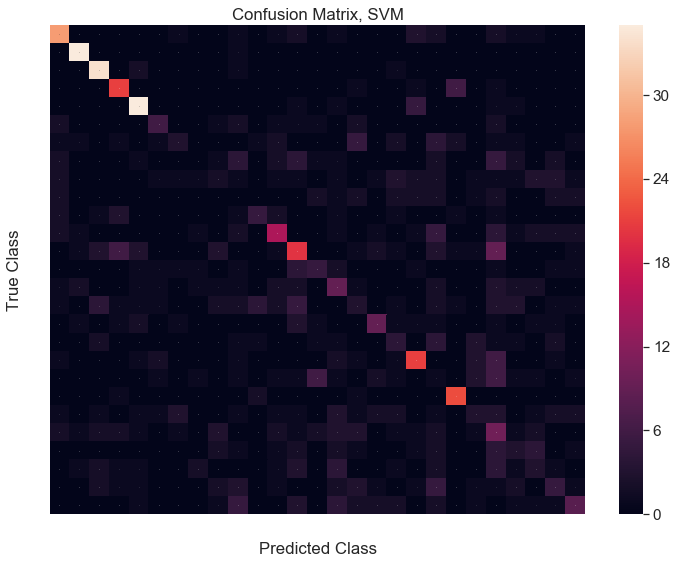

In [30]:
#build a classifier
clf = SVC()

param_dist = {"kernel": ["rbf", "linear", "poly", "sigmoid"],
              "shrinking": [True, False],
              "probability": [True, False],
              "random_state": [True, False]}

n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

random_search.fit(X_train_split, y_train_split)
print("Best params: ", random_search.best_params_); print()

y_true, y_pred = y_test_split, random_search.predict(X_test_split)

print("Classification report: "); print()
print(classification_report(y_true, y_pred))

#create and show confusion matrix
cnf_matrix = confusion_matrix(y_test_split, y_pred)
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in "                           "],
                  columns = [i for i in "                           "])
sn.set(font_scale=1.4)#for label size
plt.figure(figsize = (12,9))
sn.heatmap(df_cm, annot=True,annot_kws={"size": 0})
plt.title('Confusion Matrix, SVM')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')

# Make SVM Submission Using Best Parameters

In [24]:
SVMclf = SVC(kernel = 'linear', probability = False, shrinking = True, verbose = False, random_state = False)

SVMclf.fit(X_train, y_train)
df = pd.DataFrame(SVMclf.predict(X_test), columns=['Label'])
df.index += 1 # upgrade to one-based indexing
df.to_csv('PaulBarrett_SVM_submission.csv',index_label='ID',columns=['Label'])